# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [12]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [13]:
### To start off let's do a basic data summary.

import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Referenced classes:
10: No passing for vehicles over 3.5 metric tons
36: Go straight or right
18: General caution
39: Keep left
11: Right-of-way at the next intersection
12: Priority road
14: Stop
1: Speed limit (30km/h)
28: Children crossing
38: Keep right
9: No passing
7: Speed limit (100km/h)
17: No entry
13: Yield
40: Roundabout mandatory
25: Road work
5: Speed limit (80km/h)
2: Speed limit (50km/h)
4: Speed limit (70km/h)
8: Speed limit (120km/h)
31: Wild animals crossing
6: End of speed limit (80km/h)


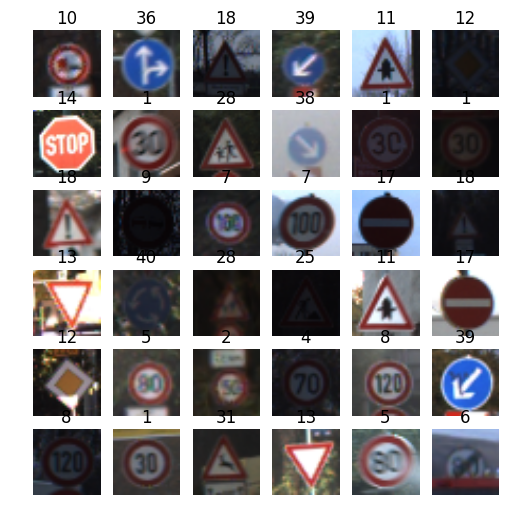

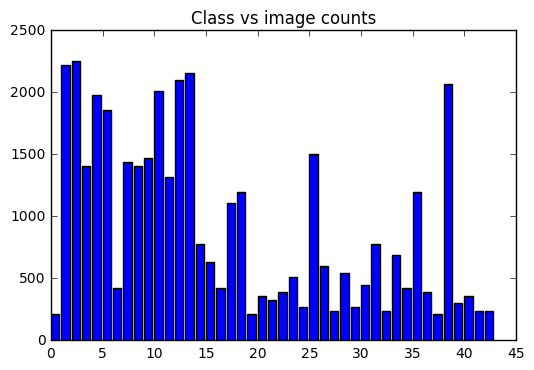

In [14]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

labels = {}

with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        labels[str(row[0])] = row[1]
        
plt.figure(figsize=(6,6))
printed_labels = {}
print("Referenced classes:")
for i in range(36):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(6, 6, i+1)
    plt.axis('off')
    plt.title(str(y_train[index]))
    plt.imshow(image, cmap="gray")
    if not str(y_train[index]) in printed_labels:
        print(str(y_train[index]) + ": " +labels[str(y_train[index])])
        printed_labels[str(y_train[index])] = 1
        
_, hist = plt.subplots()
hist.bar(range(n_classes), np.bincount(y_train))
hist.set_title('Class vs image counts')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### <font color="red">Note: code in implementation is copied from LeNet LAB notebook with parameter fitting changes only.</font>

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [16]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


In [9]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.719

EPOCH 2 ...
Validation Accuracy = 0.865

EPOCH 3 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Validation Accuracy = 0.930

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.959

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 10 ...
Validation Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.959

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.957

EPOCH 17 ...
Validation Accuracy = 0.958

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.974

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.975

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.972

EPOCH 24 ...
Validation Accura

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.1f}%".format(test_accuracy * 100))

Test Accuracy = 91.4%


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I tried to convert to grayscale and sharpen the image a bit with following code. I can see the image is being sharpened but accuracy decreases when I convert into grayscale. So I left the image as as got better score.

```
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #sharpen
    gaus = cv2.GaussianBlur(gray, (9,9), 10.0)
    sharp_image = cv2.addWeighted(gray, 1.5, gaus, -0.5, 0, gray)
    
    return sharp_image
```

Sharpening the color image, normalize the image etc. may work better- but I have not tried it.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I have splitted the train data - 80% for training and 20% for validation. I have not generated any additional data. I have kept the test set for final accuracy measurement only and used training and validation sets for the training.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

<img src="./images/LeNet.jpeg" />

I am using the LeNet architecture from the lab notebook. 

We have a convolutional layer with input depth of 3 and output depth of 6. Input image of size 32x32x3 creates output of size 28x28x6.

Then we activate the output of convolution with ReLU activation layer.

Then we use a pooling layer to pool the output and get a 14x14x6 sized output.

We run through 2nd convolutional layer to get an output of size 10x10x6 and run through a ReLU activation layer and then a subsampling layer with max pooling and get an output of size 5x5x16.

We flatten the output and get flatten output vector of size 400.

We pass the flatten vector into a fully connected layer of width 120 and apply a ReLU activation to the fully connected output.

We pass through the output into another fully connected layer of width 84 and run through anothe ReLU activation layer.

We then attach a fully connected output layer with width 43 - the number of traffic sign classes.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Used the Adam optimizer with learning rate of 0.001 and batch size of 128. Used 50 epochs to train the model. For the convolutional layers used mu = 0 and sigma = 0.1 hyper parameters to generate weights.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I have first tried a single convolution layer with a fully connected laye, setup the parameters and got accuracy of 5.9%. The network with two colvolutional layer, ReLU activations and dropout layer that gives 99.33% accuracy on MNIST dataset gave a 13% accuracy for the traffic sign classifier. Then I took the LeNet from lab and without tuning any parameters and directly using the model gives 87% accuracy for 10 epochs and 91.4% accuracy for 50 epochs on test dataset.





---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

<!--
<img src="./images/aheadonly.jpg" />
<img src="./images/construction.jpg" />
<img src="./images/limit30.jpg" />
<img src="./images/stop.jpg" />
<img src="./images/yield.jpg" />
-->

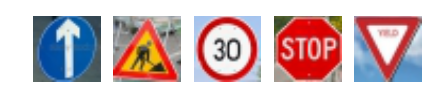

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#instal Pilliw with pip install Pillow
import numpy as np
import matplotlib.image as img
import cv2

images = []
images.append(img.imread("./images/aheadonly.jpg", cv2.CV_8UC1))
images.append(img.imread("./images/construction.jpg", cv2.CV_8UC1))
images.append(img.imread("./images/limit30.jpg", cv2.CV_8UC1))
images.append(img.imread("./images/stop.jpg", cv2.CV_8UC1))
images.append(img.imread("./images/yield.jpg", cv2.CV_8UC1))

plt.figure(figsize=(5,5))
printed_labels = {}

for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray")

X_collected = np.array([img for img in images])
y_collected = np.array([35,25,1,14,13])

labels=["35: Ahead only","25: Road work","1: Speed limit (30km/h)","14: Stop", "13: Yield"]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The road work sign has some background noises and the model can not detect it. Also the detected Bycicle crossing is very close to road work with similar shape.

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_collected, y_collected)
    print("Test Accuracy = {:.1f}%".format(test_accuracy * 100))
    print("Label detection success")
    print("-----------------------")
    success = sess.run(correct_prediction, feed_dict={x: X_collected, y: y_collected})
    
    for i in range(len(labels)):
        print(labels[i], str(success[i]))
    

Test Accuracy = 80.0%
Label detection success
-----------------------
35: Ahead only True
25: Road work False
1: Speed limit (30km/h) True
14: Stop True
13: Yield True


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model could detect 4 images out of five - a 80% accuracy for test images collected from the web. It is lower than the test image performance of 91%. But since I have only added 5 images if network does not perform at 100% this is as good as it can get with anything less than 100%. The wrongly labeled sign of road work as bycycle crossing suggests that if there are similar shaped signs it is possible to detect wrong sign. The model needs to be more sofisticated to detect small variations at the center of sign inside the prominent outer shape. From further investigation (question 8) it seems that the detected correct signs softmax probabilities are close for other signs as well which means network will perform worse if given more choices.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

TopKV2(values=array([[ 263.87393188,  110.45248413,  108.05628204],
       [  42.3143692 ,   28.01078606,   27.20366096],
       [ 129.38790894,   93.6443634 ,   42.04655075],
       [  34.14560318,   33.039711  ,   23.32645416],
       [ 273.38146973,  109.93031311,   96.35746002]], dtype=float32), indices=array([[35, 25, 36],
       [29, 28, 25],
       [ 1,  0,  4],
       [14, 13, 22],
       [13,  3,  1]], dtype=int32))
Expected: Ahead only. Detected  [Ahead only 263.874] [Road work 110.452] [Go straight or right 108.056]
Expected: Road work. Detected  [Bicycles crossing 42.3144] [Children crossing 28.0108] [Road work 27.2037]
Expected: Speed limit (30km/h). Detected  [Speed limit (30km/h) 129.388] [Speed limit (20km/h) 93.6444] [Speed limit (70km/h) 42.0466]
Expected: Stop. Detected  [Stop 34.1456] [Yield 33.0397] [Bumpy road 23.3265]
Expected: Yield. Detected  [Yield 273.381] [Speed limit (60km/h) 109.93] [Speed limit (30km/h) 96.3575]


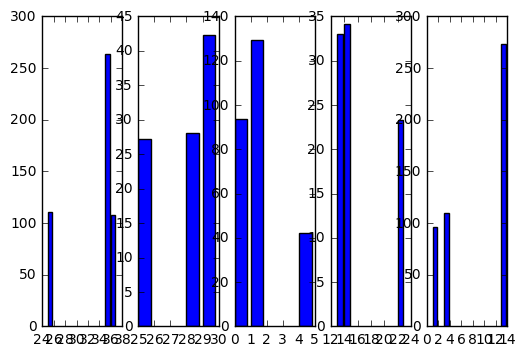

In [62]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    probalities = sess.run(logits, feed_dict={x: X_collected, y: y_collected})
    top = tf.nn.top_k(probalities, k=3)
    top_k = sess.run(top)
    
expected = [35,25,1,14,13]
# Detected   [35,29,1,14,13 ]

import random
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline


print(top_k)

labels = {}

with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        labels[str(row[0])] = row[1]    

_, hist = plt.subplots(1,5)
for i in range(5):
    ls = "Expected: " + labels[str(expected[i])] +". Detected " ;
    for li in range(3):
        ls = ls + " [" +(labels[str(top_k.indices[i][li])]) + " " +str(top_k.values[i][li]) + "]"
    print(ls)
    hist[i].bar(top_k.indices[i], top_k.values[i])    
    

All correct signs are present in top three probabilities. The wrongly labeled road work for second sign is in the second position where the model detected three signs with probability very close to one another (42.21, 28.01, 27.20) for very similar signs of Road work, Bicycles crossing and Children crossing. For the stop sign it detected stop sign correctly but yield and bumpy got very close score as well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.